In [63]:
# Plotting libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Scikit learn
import sklearn.preprocessing as skp
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
# Scikit Metrics
from sklearn.metrics import log_loss, classification_report, accuracy_score, f1_score,roc_auc_score
# Data manipulation libraries
import pandas as pd
import numpy as np
# General use
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(8,4)})
plt.rcParams.update({'font.size': 8})
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend',fontsize=10)

In [64]:
file_name = 'house_price_train.csv'
df = pd.read_csv(file_name)
df = df.dropna()
df.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
0,1898,2014-06-04 00:00:00,4.0,2.50,2770,45514,2.0,0,0,4,2770,0,1989,0,18630 NE 202nd St,Woodinville,WA 98077,USA,685000.0
1,1370,2014-05-27 00:00:00,4.0,3.00,3720,29043,2.0,0,0,3,3720,0,1991,0,10161 134th Pl NE,Kirkland,WA 98033,USA,857000.0
2,3038,2014-06-23 00:00:00,4.0,2.50,2810,11120,2.0,0,0,3,2810,0,1982,0,22120 NE 26th Pl,Sammamish,WA 98074,USA,675000.0
3,2361,2014-06-12 00:00:00,4.0,3.75,4030,10800,2.0,0,0,3,4030,0,2006,0,619 9th Ave,Kirkland,WA 98033,USA,1485000.0
4,156,2014-05-06 00:00:00,3.0,2.00,2000,7000,2.0,0,0,3,2000,0,1916,1986,6422 Marshall Ave SW,Seattle,WA 98136,USA,561000.0


In [65]:
#data_df = data_df.drop(columns=['date'])
num_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = num_df.corr()
#print(correlation_matrix)

price_correlation = correlation_matrix[['price']].sort_values(by='price', ascending=False)
price_correlation

,price
price,1.000000
sqft_living,0.679567
sqft_above,0.576975
bathrooms,0.503323
view,0.359010
sqft_basement,0.335466
bedrooms,0.313703
floors,0.254857
waterfront,0.222845
sqft_lot,0.076779


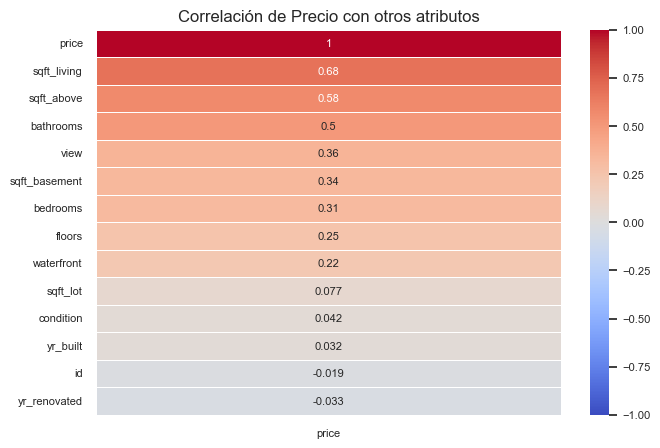

In [66]:
plt.figure(figsize=(7.5, 5))

# Crear el mapa de calor
sns.heatmap(price_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Configurar el título y etiquetas
plt.title('Correlación de Precio con otros atributos')
plt.show()

Observamos que lo más importante a la hora de comparar precios es el tamaño de la vivienda, los pies cuadrados del espacio interior de la vivienda que están por encima del nivel del suelo, y de los baños de ésta.

Mientras que los menos relevantes son el año de construcción y el año de la última renovación.

In [74]:
one_hot_encoded = pd.get_dummies(df['city'], prefix='city')
df_encoded = pd.concat([df['price'], one_hot_encoded], axis=1)

df_app = pd.concat([df['price'], one_hot_encoded], axis=1)

cm_ndf = df_app.corr()

# Extraer solo la correlación de 'price' con las demás características
price_correlation = cm_ndf[['price']].sort_values(by='price', ascending=False)

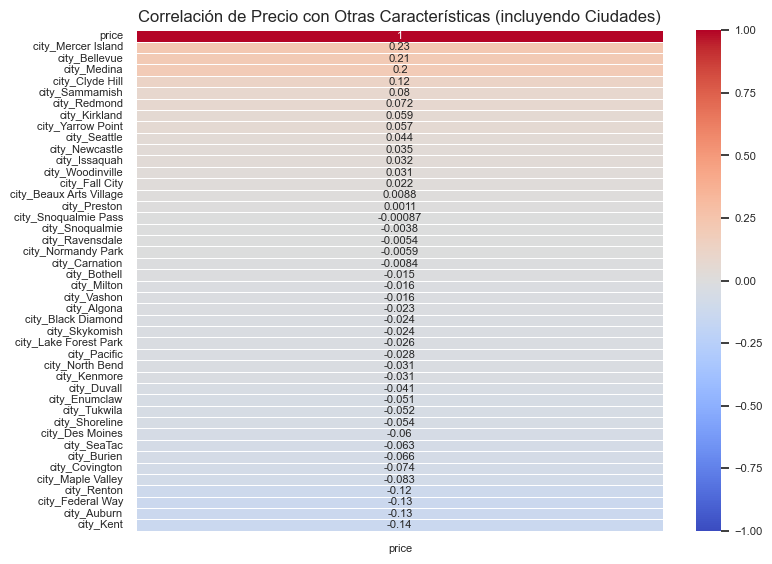

In [75]:
plt.figure(figsize=(8.5, 6.5))

# Crear el mapa de calor
sns.heatmap(price_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Configurar el título y etiquetas
plt.title('Correlación de Precio con Otras Características (incluyendo Ciudades)')
plt.show()

Con esto podemos ver que hay un par de ciudades que son bastante relevantes con respecto al precio de las viviendas, así como suelen ser más caras en ciudades como